## **Install libraries**

In [ ]:
# yfinance is a popular open source library developed by Ran Aroussi 
# as a means to access the financial data available on Yahoo Finance.
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.4 MB 53.2 MB/s 
     |████████████████████████████████| 63 kB 43.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Useful library to easily calculate technical indicators
!pip install talib-binary

     |████████████████████████████████| 2.4 MB 25.1 MB/s 


## **Import Python Libraries**

In [ ]:
import yfinance as yf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#importing technical indicators
from talib import EMA, RSI, OBV

## **Download Historical Data from yahoo finance**

In [ ]:
# create a ticker object with a ticker symbol, and then simple method calls 
# on the object return absolutely everything you could want to know.
eur_usd = yf.Ticker('EURUSD=X')

In [ ]:
print(eur_usd.info)

{'exchange': 'CCY', 'shortName': 'EUR/USD', 'exchangeTimezoneName': 'Europe/London', 'exchangeTimezoneShortName': 'GMT', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '0', 'quoteType': 'CURRENCY', 'symbol': 'EURUSD=X', 'messageBoardId': 'finmb_EUR_X', 'market': 'ccy_market', 'previousClose': 1.1317338, 'regularMarketOpen': 1.1348162, 'twoHundredDayAverage': 1.1577363, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': None, 'regularMarketDayHigh': 1.1348162, 'navPrice': None, 'averageDailyVolume10Day': 0, 'totalAssets': None, 'regularMarketPreviousClose': 1.1317338, 'fiftyDayAverage': 1.1330172, 'trailingAnnualDividendRate': None, 'open': 1.1348162, 'toCurrency': None, 'averageVolume10days': 0, 'expireDate': None, 'yield': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'beta': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 1.1348162, 'priceHint': 4, 'currency': 'USD', 'regularMarketVolume': 0, 'lastMarket': No

In [ ]:
eur_usd_historical = eur_usd.history(start="2020-01-01", end="2022-01-01", interval="1d")

In [ ]:
eur_usd_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-01,1.122083,1.122838,1.115947,1.122083,0,0,0
2020-01-02,1.121894,1.122712,1.116682,1.122083,0,0,0
2020-01-03,1.117081,1.118068,1.112570,1.117144,0,0,0
2020-01-06,1.116246,1.120825,1.115810,1.116196,0,0,0
2020-01-07,1.119583,1.119946,1.113487,1.119799,0,0,0
...,...,...,...,...,...,...,...
2021-12-27,1.132387,1.133500,1.130416,1.132426,0,0,0
2021-12-28,1.132978,1.133600,1.129038,1.133003,0,0,0
2021-12-29,1.131337,1.137001,1.127536,1.131478,0,0,0


In [ ]:
# we drop columns we don't need
data = eur_usd_historical.drop(["Dividends","Stock Splits", "Volume"], axis=1)

In [ ]:
data.head()

,Open,High,Low,Close
Date,,,,
2020-01-01,1.122083,1.122838,1.115947,1.122083
2020-01-02,1.121894,1.122712,1.116682,1.122083
2020-01-03,1.117081,1.118068,1.112570,1.117144
2020-01-06,1.116246,1.120825,1.115810,1.116196
2020-01-07,1.119583,1.119946,1.113487,1.119799


In [ ]:
# we make a copy so that we don't mess with initial downloaded file
df = data.copy()

## **Calculate Technical Indicators**

In [ ]:
ema_short_period=10
ema_long_period=30
rsi_period=14

In [ ]:
df["ema_short"]=EMA(np.array(df.Close), timeperiod=ema_short_period)

In [ ]:
df["ema_long"]=EMA(np.array(df.Close), timeperiod=ema_long_period)

In [ ]:
df["rsi"]=RSI(np.array(df.Close), timeperiod=rsi_period)

In [ ]:
df.tail()

,Open,High,Low,Close,ema_short,ema_long,rsi
Date,,,,,,,
2021-12-27,1.132387,1.133500,1.130416,1.132426,1.130553,1.133759,49.357627
2021-12-28,1.132978,1.133600,1.129038,1.133003,1.130999,1.133711,50.099073
2021-12-29,1.131337,1.137001,1.127536,1.131478,1.131086,1.133567,48.095309
2021-12-30,1.135976,1.135976,1.130071,1.136015,1.131982,1.133725,53.989713
2021-12-31,1.132323,1.137915,1.130506,1.132503,1.132077,1.133646,49.320626


## **Calculate returns and the the signal for our strategy**

In [ ]:
df["returns"]=df.Close.pct_change()

In [ ]:
df.tail()

,Open,High,Low,Close,ema_short,ema_long,rsi,returns
Date,,,,,,,,
2021-12-27,1.132387,1.133500,1.130416,1.132426,1.130553,1.133759,49.357627,-0.000272
2021-12-28,1.132978,1.133600,1.129038,1.133003,1.130999,1.133711,50.099073,0.000510
2021-12-29,1.131337,1.137001,1.127536,1.131478,1.131086,1.133567,48.095309,-0.001346
2021-12-30,1.135976,1.135976,1.130071,1.136015,1.131982,1.133725,53.989713,0.004010
2021-12-31,1.132323,1.137915,1.130506,1.132503,1.132077,1.133646,49.320626,-0.003092


In [ ]:
# we choose as signal the positive returns
df['signal'] = np.where(df.returns>0, 1, -1)

In [ ]:
df.head(10)

,Open,High,Low,Close,ema_short,ema_long,rsi,returns,signal
Date,,,,,,,,,
2020-01-01,1.122083,1.122838,1.115947,1.122083,NaN,NaN,NaN,NaN,-1
2020-01-02,1.121894,1.122712,1.116682,1.122083,NaN,NaN,NaN,0.000000,-1
2020-01-03,1.117081,1.118068,1.112570,1.117144,NaN,NaN,NaN,-0.004401,-1
2020-01-06,1.116246,1.120825,1.115810,1.116196,NaN,NaN,NaN,-0.000848,-1
2020-01-07,1.119583,1.119946,1.113487,1.119799,NaN,NaN,NaN,0.003228,1
2020-01-08,1.115573,1.116520,1.111086,1.115474,NaN,NaN,NaN,-0.003863,-1
2020-01-09,1.111444,1.112223,1.109509,1.111321,NaN,NaN,NaN,-0.003723,-1
2020-01-10,1.110926,1.112100,1.108623,1.111111,NaN,NaN,NaN,-0.000189,-1
2020-01-13,1.111655,1.114467,1.111408,1.111667,NaN,NaN,NaN,0.000500,1


In [ ]:
df['signal']=df['signal'].shift(-1)

In [ ]:
df.tail()

,Open,High,Low,Close,ema_short,ema_long,rsi,returns,signal
Date,,,,,,,,,
2021-12-27,1.132387,1.133500,1.130416,1.132426,1.130553,1.133759,49.357627,-0.000272,1.0
2021-12-28,1.132978,1.133600,1.129038,1.133003,1.130999,1.133711,50.099073,0.000510,-1.0
2021-12-29,1.131337,1.137001,1.127536,1.131478,1.131086,1.133567,48.095309,-0.001346,1.0
2021-12-30,1.135976,1.135976,1.130071,1.136015,1.131982,1.133725,53.989713,0.004010,-1.0
2021-12-31,1.132323,1.137915,1.130506,1.132503,1.132077,1.133646,49.320626,-0.003092,NaN


In [ ]:
df.shape

(523, 9)

In [ ]:
df = df.dropna(axis=0, how='any')

In [ ]:
df.shape

(493, 9)

## **Create the ML, fit it and score it**

In [ ]:
# import machine learning modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df[['Open', 'High', 'Low',	'Close', 'ema_short',	'ema_long',	'rsi'	]]

In [ ]:
y = df['signal']

In [ ]:
# we split the dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
# we define a set a parameters to choose the best from using the RandomizedSearchCV
rf_params = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]
}

In [ ]:
# Run a randomized search over the hyperparameters
rf_search = RandomizedSearchCV(rf_clf, param_distributions=rf_params)

# Fit the model on the training data
rf_search.fit(X_train, y_train)

# Make predictions on the test data
rf_model = rf_search.best_estimator_

In [ ]:
preds = rf_model.predict(X_test)

In [ ]:
# Metrics
accuracy = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)

In [ ]:
print(f'accuracy = {accuracy} \n f1 = {f1}')

accuracy = 0.6060606060606061 
 f1 = 0.6608695652173913


## **Make predictions on the whole set**

In [ ]:
df_all = df[['Open', 'High', 'Low',	'Close', 'ema_short',	'ema_long',	'rsi', 'returns']]

In [ ]:
df_all.head()

,Open,High,Low,Close,ema_short,ema_long,rsi,returns
Date,,,,,,,,
2020-02-11,1.091227,1.092700,1.089348,1.091346,1.100112,1.108732,23.615600,-0.003274
2020-02-12,1.092180,1.092500,1.088708,1.091941,1.098626,1.107648,25.033937,0.000546
2020-02-13,1.087642,1.089087,1.083553,1.087595,1.096621,1.106355,21.846859,-0.003981
2020-02-14,1.084599,1.086248,1.083130,1.084599,1.094435,1.104951,19.960435,-0.002755
2020-02-17,1.084058,1.085400,1.083025,1.084175,1.092569,1.103611,19.701599,-0.000390


In [ ]:
predictors = ['Open', 'High', 'Low',	'Close', 'ema_short',	'ema_long',	'rsi']

In [ ]:
df_all['signal'] = rf_model.predict(X.loc[:,predictors]) 

In [ ]:
df_all.head()

,Open,High,Low,Close,ema_short,ema_long,rsi,returns,signal
Date,,,,,,,,,
2020-02-11,1.091227,1.092700,1.089348,1.091346,1.100112,1.108732,23.615600,-0.003274,-1.0
2020-02-12,1.092180,1.092500,1.088708,1.091941,1.098626,1.107648,25.033937,0.000546,-1.0
2020-02-13,1.087642,1.089087,1.083553,1.087595,1.096621,1.106355,21.846859,-0.003981,-1.0
2020-02-14,1.084599,1.086248,1.083130,1.084599,1.094435,1.104951,19.960435,-0.002755,-1.0
2020-02-17,1.084058,1.085400,1.083025,1.084175,1.092569,1.103611,19.701599,-0.000390,-1.0


## **Compute sharpe ratio and maximum drawdown**

In [ ]:
# Compute the cumulative returns
def compute_ret(df): 
    df['cum_ret'] = (df.returns+1).cumprod()
    df['strategy_ret'] = df.returns * df.signal
    df['cum_strategy_ret'] = (df.strategy_ret+1).cumprod()  
    return df

In [ ]:
compute_ret(df_all).dropna()

,Open,High,Low,Close,ema_short,ema_long,rsi,returns,signal,cum_ret,strategy_ret,cum_strategy_ret
Date,,,,,,,,,,,,
2020-02-11,1.091227,1.092700,1.089348,1.091346,1.100112,1.108732,23.615600,-0.003274,-1.0,0.996726,0.003274,1.003274
2020-02-12,1.092180,1.092500,1.088708,1.091941,1.098626,1.107648,25.033937,0.000546,-1.0,0.997270,-0.000546,1.002726
2020-02-13,1.087642,1.089087,1.083553,1.087595,1.096621,1.106355,21.846859,-0.003981,-1.0,0.993300,0.003981,1.006718
2020-02-14,1.084599,1.086248,1.083130,1.084599,1.094435,1.104951,19.960435,-0.002755,-1.0,0.990564,0.002755,1.009491
2020-02-17,1.084058,1.085400,1.083025,1.084175,1.092569,1.103611,19.701599,-0.000390,-1.0,0.990177,0.000390,1.009885
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,1.132464,1.134430,1.130838,1.132734,1.130137,1.133851,49.723380,-0.000136,1.0,1.034526,-0.000136,1.107724
2021-12-27,1.132387,1.133500,1.130416,1.132426,1.130553,1.133759,49.357627,-0.000272,1.0,1.034245,-0.000272,1.107423
2021-12-28,1.132978,1.133600,1.129038,1.133003,1.130999,1.133711,50.099073,0.000510,-1.0,1.034772,-0.000510,1.106859


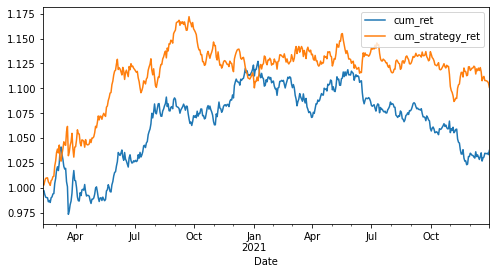

In [ ]:
#plot the returns
df_all['cum_ret'].plot(figsize=(8,4))
df_all['cum_strategy_ret'].plot(figsize=(8,4))
plt.legend(loc='upper right')
plt.show()

In [ ]:
# sharpe ratio calculation
def sharpe(df):    
    sharpe_ratio = ((1+df.strategy_ret.mean())**252-1)/(df.strategy_ret.std()*np.sqrt(252))
    return sharpe_ratio

In [ ]:
print(sharpe(df_all))

0.7857236388398742


In [ ]:
# max drawdown calculation
# A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, 
# before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
def drawdown(df):
  #drawdown = (df.strategy_ret+1).cumprod().diff().max()
  drawdown = np.ptp(df['cum_strategy_ret'])/df['cum_strategy_ret'].max()
  return drawdown

In [ ]:
print(drawdown(df_all))

0.1447015729872


## **Improvement Suggestions**



1.   Getting more data
2.   Changing the model hyperparameters
3.   Changing model to SVM or AdaBoostClassifier
4.   Adding other technical indicators
5.   Assess the feature importance
6.   Scale the data



